# Tutorial de fenomenología de bariones pesados
Author: Andres Ramirez-Morales (andres.ramirez@tec.mx)

Bienvenido al tutorial de fenomenología de bariones pesados.
En este tutorial se practicará como hacer ajustes de datos que vienen de experimentos de altas energías a un modelo parametrizado propuesto en nuestro artículo publicado *Physical Review D*. El objetivo es encontrar los parámetros del modelo que mejor describan los datos antes mencionados.

https://journals.aps.org/prd/pdf/10.1103/PhysRevD.107.034031

In [6]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install iminuit
!pip install scipy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   - -------------------------------------- 2.1/44.5 MB 13.9 MB/s eta 0:00:04
   ------ --------------------------------- 7.1/44.5 MB 19.7 MB/s eta 0:00:02
   ---------- ----------------------------- 11.3/44.5 MB 19.4 MB/s eta 0:00:02
   -------------- ------------------------- 15.7/44.5 MB 20.2 MB/s eta 0:00:02
   ------------------ --------------------- 20.7/44.5 MB 21.1 MB/s eta 0:00:02
   --------------------- ------------------ 23.9/44.5 MB 20.0 MB/s eta 0:00:02
   ------------------------ --------------- 26.7/44.5 MB 19.0 MB/s eta 0:00:01
   -------------------------- ------------- 29.9/44.5 MB 18.5 MB/s eta 0:00:01
   ------------------------------ --------- 33.6/44.5 MB 18.3 MB/s eta 0:00:01
   --------------------------------- ------ 37.5/44.5 MB 18.4 MB/s eta 0:00:01
   ------------------------------------- -- 41.4/44.5 MB 18.5 MB/s eta 0:00:01
   ---------------------------------------  44.3/44.5 MB 18.7 M


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1. Importar paqueterías  
El código en este tutorial está escrito en python3.
Por lo tanto, importemos las librerías básicas que usaremos.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy.stats import norm, shapiro

## 2. Definir los números cuánticos
Vivimos en un mundo cuántico en donde todo esta regido por números que toman valores estrictamente discretos...

Usemos arreglos de numpy para definir los valores que toman estos números de spin, sabor, spin-orbita.

**Ejercicio:** Analizar el significado de estos números.

In [51]:
w_om=1.732050808 # omega_lam
param_v          = np.array([0.00, w_om, w_om, w_om, w_om,   0.00, 0.00, w_om,   0.00, 0.00, w_om,   0.00, w_om, w_om,   0.00, w_om]) # coef infront kprim_c
param_w          = np.array([0.75, 0.75, 0.75, 3.75, 3.75,   0.75, 3.75, 3.75,   0.75, 3.75, 0.75,   0.75, 0.75, 0.75,   0.75, 0.75]) # coef infront A
param_x          = np.array([0.00, -1.0, 0.50, -2.5, -1.0,   0.00, 0.00, 1.50,   0.00, 0.00, -1.0,   0.00, -1.0, 0.50,   0.00, 0.50]) # coef infront B
param_y          = np.array([0.00, 0.00, 0.00, 0.00, 0.00,   0.75, 0.75, 0.75,   2.00, 2.00, 2.00,   0.00, 0.00, 0.00,   0.75, 0.75]) # coef infront E
param_z          = np.array([10/3, 10/3, 10/3, 10/3, 10/3,   10/3, 10/3, 10/3,   10/3, 10/3, 10/3,   4/3 , 4/3 , 4/3 ,   4/3 , 4/3 ]) # coef infront G    
# quark content
param_q1         = np.array([1.00, 1.00, 1.00, 1.00, 1.00,   1.00, 1.00, 1.00,   1.00, 1.00, 1.00,   1.00, 1.00, 1.00,   1.00, 1.00]) # coef m1 heavy quark
param_q2         = np.array([2.00, 2.00, 2.00, 2.00, 2.00,   1.00, 1.00, 1.00,   0.00, 0.00, 0.00,   0.00, 0.00, 0.00,   1.00, 1.00]) # coef m2 strange quark
param_q3         = np.array([0.00, 0.00, 0.00, 0.00, 0.00,   1.00, 1.00, 1.00,   2.00, 2.00, 2.00,   2.00, 2.00, 2.00,   1.00, 1.00]) # coef m3 light quark
# harmonic oscillator mode
param_is_rho     = np.array([9.99, 0.00, 0.00, 0.00, 0.00,   9.99, 9.99, 0.00,   9.99, 9.99, 0.00,   9.99, 0.00, 0.00,   9.99, 0.00]) # coef kp
param_is_lam     = np.array([9.99, 1.00, 1.00, 1.00, 1.00,   9.99, 9.99, 1.00,   9.99, 9.99, 1.00,   9.99, 1.00, 1.00,   9.99, 1.00]) # coef kp
# kind of baryon
param_is_omega   = np.array([1.00, 1.00, 1.00, 1.00, 1.00,   0.00, 0.00, 0.00,   0.00, 0.00, 0.00,   0.00, 0.00, 0.00,   0.00, 0.00]) # coef kp
param_is_cascade = np.array([0.00, 0.00, 0.00, 0.00, 0.00,   1.00, 1.00, 1.00,   0.00, 0.00, 0.00,   0.00, 0.00, 0.00,   1.00, 1.00]) # coef kp
param_is_sigma   = np.array([0.00, 0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00,   1.00, 1.00, 1.00,   1.00, 1.00, 1.00,   0.00, 0.00]) # coef kp

## 3. Definir el modelo fenomenológico
Como se mencionó, se propone un modelo fenomenológico para describir la masa-energía de los bariones pesados.

Este modelo esta parámetrizado, es decir, usa factores multiplicativos relacionados con los números cuánticos.
En este modelo estos parámetros, son las masas de los quarks, la constante del resorte del oscilador, y los factores relacionados con el spin, spin-orbita, sabor.

**Ejercicio:** Analizar y en entender la siguiente función.

In [52]:
def model(q1, q2, q3, is_rho, is_lam, is_omega, is_cascade, is_sigma, v, w, x, y, z, m1, m2, m3, k, a, b, e, g):
    """
    mass model, m1 == heavy, m2== strange, m3 == light
    """
    return q1*m1 + q2*m2 + q3*m3 + \
        v*k*np.sqrt(1./(is_rho*(is_omega*m2 + is_cascade*((m2+m3)/2) + is_sigma*m3 ) + \
                        is_lam*(is_omega*((3*m2*m1)/(2.*m2+m1)) + is_cascade*((1.5*(m2+m3)*m1)/(m1+m2+m3)) + is_sigma*((3.*m3*m1)/(2.*m3+m1)) ) )) + \
                  w*a + x*b + y*e + z*g

## 4. Definir la suma de diferencias al cuadrado
Ahora pasemos a la parte de ciencia de datos o estadística.
Una de las formas más eficientes para ajustar o encontrar parámetros en un modelo, es mediante la minimización de la diferencia entre nuestra predicción del modelo y el mundo real (donde se mide).
Por esta razón se usa el conocido mínimos cuadrados y se minimiza en función de los parámetros.

**Ejercicio**: Analizar y estudiar la siguiente función de mínimos cuadrados. Identifique cuales son los parámetros que se buscan encontrar.

In [53]:
def least_squares(m1, m2, m3, k, a, b, e, g):
    yvar_2 = 0.001
    pred_m = model(param_q1, param_q2, param_q3, param_is_rho, param_is_lam,
                   param_is_omega, param_is_cascade, param_is_sigma, param_v,
                   param_w, param_x, param_y, param_z,
                   m1, m2, m3, k, a, b, e, g)
    yval_2 = np.power( (pred_m - exp_m), 2)
    return np.sum( np.divide(yval_2, yvar_2) )

## 5. Definir el ajustador
En la práctica, tenemos software que hace la minimización por nosotros. Es decir, aunque es muy instructivo hacer la minimización a mano con cálculo diferencial, aquí usamos el software iMinuit para lograr esta minimización.

**Ejercicio**: Analizar y estudiar la siguiente función minimización. Identifique cuales son los parámetros que se buscan encontrar y explique la definición de los rangos de las masas de los quarks.



In [54]:
def fit(least_squares):
    m = Minuit(least_squares, m1=1, m2=1, m3=1, k=0, a=0, b=0, e=0, g=0)#1400, m2=300, m3=250, k=0, a=0, b=0, e=0, g=0)
    m.limits['m1'] = (4000, 6000)
    m.limits['m2'] = (400, 470)
    m.limits['m3'] = (250, 300)
    m.errordef=Minuit.LEAST_SQUARES
    m.migrad()
    return m

## 6. Definir las funciones de probabilidad
En esta parte definimos las distribuciones que suponemos van a describir las observaciones experimentales.

Usamos la distribución Gaussiana por el hecho que los experimentos de altas energías reportan sus resultados como el valor medio del ajuste de lo que se mide a una Gaussiana.

**Ejercicio**: Estudie las siguientes funciones. Indique por que se están definiendo dos funciones, explique su utilidad.


In [55]:
def sample_gauss(mu, sigma):
    return np.random.normal(mu, sigma, 10000)

def random(sample, random_n=1):
    return np.random.choice(sample, size=None)

## 7. Definir los datos reales provenientes de los experimentos LHCb y Belle

**Ejercicio**: Encuentre en el sitio web Particle Data Group los datos de bariones bottom. Compruebe que los datos que se están usando en este tutorial coinciden con lo reportado experimentalmente.

In [56]:
sigma_model = 12.47**2 # obtained with optimization (Li.Jin)
# gaussian pdf with the measured value and with experimental and model(sigma_model) uncertainties
# Omegas
gauss_6061 = sample_gauss(6045.2, np.power((1.20**2 + sigma_model), 0.5 )) # PDG::Direct
gauss_6316 = sample_gauss(6315.6, np.power((0.60**2 + sigma_model), 0.5 )) # PDG::Direct 
gauss_6330 = sample_gauss(6330.3, np.power((0.60**2 + sigma_model), 0.5 )) # PDG::Direct
gauss_6340 = sample_gauss(6339.7, np.power((0.60**2 + sigma_model), 0.5 )) # PDG::Direct
gauss_6350 = sample_gauss(6349.8, np.power((0.60**2 + sigma_model), 0.5 )) # PDG::Direct
# Cascade b sextet
gauss_5935 = sample_gauss(5935.0, np.power((0.05**2 + sigma_model), 0.5 )) # PDG::Direct
gauss_5953 = sample_gauss(5953.8, np.power((1.62**2 + sigma_model), 0.5 )) # PDG::Average
gauss_6328 = sample_gauss(6227.4, np.power((1.69**2 + sigma_model), 0.5 )) # PDG::Average (decided to be cascade prime)
# Sigma b
gauss_5813 = sample_gauss(5813.1, np.power((2.55**2 + sigma_model), 0.5 )) # PDG::Average
gauss_5837 = sample_gauss(5832.5, np.power((2.23**2 + sigma_model), 0.5 )) # PDG::Average
gauss_6097 = sample_gauss(6096.9, np.power((2.10**2 + sigma_model), 0.5 )) # PDG::Average
# Lambda b
gauss_5617 = sample_gauss(5619.6, np.power((0.17**2 + sigma_model), 0.5 )) # PDG::Direct
gauss_5912 = sample_gauss(5912.2, np.power((0.17**2 + sigma_model), 0.5 )) # PDG::Direct
gauss_5920 = sample_gauss(5920.1, np.power((0.17**2 + sigma_model), 0.5 )) # PDG::Direct
gauss_6146 = sample_gauss(6146.2, np.power((0.40**2 + sigma_model), 0.5 )) # PDG::Direct (not in the fit)
gauss_6152 = sample_gauss(6152.5, np.power((0.40**2 + sigma_model), 0.5 )) # PDG::Direct (not in the fit)
gauss_6070 = sample_gauss(6072.3, np.power((2.90**2 + sigma_model), 0.5 )) # PDG::Direct (not in the fit)
# Cascades b anti-3-plet
gauss_5794 = sample_gauss(5794.5, np.power((2.61**2 + sigma_model), 0.5 )) # PDG::Average
gauss_6100 = sample_gauss(6100.3, np.power((0.60**2 + sigma_model), 0.5 )) # PDG::Direct
gauss_6327 = sample_gauss(6329.9, np.power((2.72**2 + sigma_model), 0.5 )) # LHCB::Average (not in the fit)

## 8. Ejecutar la simulación

**Ejercicio**: Encontrar un número de eventos razonable para obtener suficiente cantidad de datos.

In [57]:
# number of events to simulate
n_events = 100

# arrays to store the sampled parameters
sampled_k,sampled_a,sampled_b,sampled_e,sampled_g = ([]),([]),([]),([]),([])
sampled_m1,sampled_m2,sampled_m3 = ([]),([]),([])

count = 0
# construct the sampling distribution MONTE CARLO simulation
for i in range(n_events):
    
    exp_m = np.array([ # measured baryon masses
        # omegas
        random(gauss_6061),
        random(gauss_6316),
        random(gauss_6330),
        random(gauss_6340),
        random(gauss_6350),
        # Cascade 
        random(gauss_5935),
        random(gauss_5953),
        random(gauss_6328),
        # Sigma b         
        random(gauss_5813),
        random(gauss_5837),
        random(gauss_6097),
        # Lambda b
        random(gauss_5617),
        random(gauss_5912),
        random(gauss_5920),
        # Cascades
        random(gauss_5794),
        random(gauss_6100),
    ])    
    # perform the parameter fitting (via minimizing squared distance)
    m = fit(least_squares)
    
    if type(m.covariance) != type(None):
        count += 1
    else:
        continue

    sampled_m1 = np.append(sampled_m1, m.values['m1'])
    sampled_m2 = np.append(sampled_m2, m.values['m2'])
    sampled_m3 = np.append(sampled_m3, m.values['m3'])

    sampled_k = np.append(sampled_k, m.values['k'])
    sampled_a = np.append(sampled_a, m.values['a'])
    sampled_b = np.append(sampled_b, m.values['b'])
    sampled_e = np.append(sampled_e, m.values['e'])
    sampled_g = np.append(sampled_g, m.values['g'])

## 9. Visualizar resultados

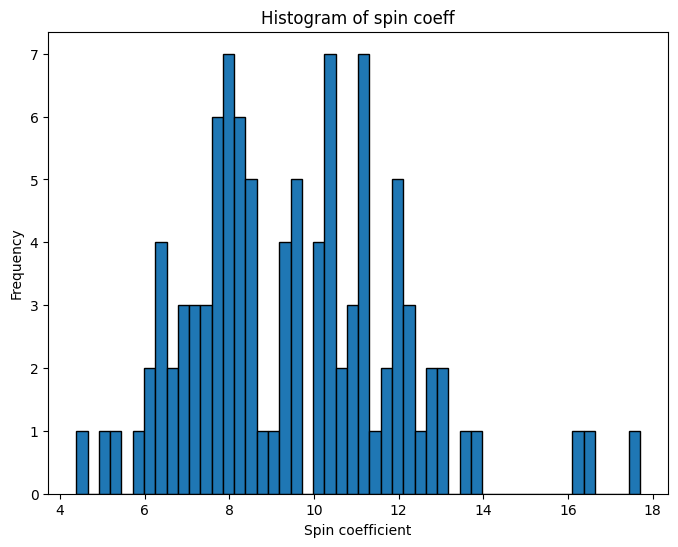

4929 mb 16
464 ms 8
298 mn 6
K 0.02552658439108691 KB 1.3244038240919638e-05
A 9.514869316103676  PS  2.464909698915887
B 4.031147066779167  PSL  4.108197446040931
E 35.2760849400328  PI   6.56353464227251
G 59.8164460370601  PF  5.172026557319575


In [58]:
# save bootstrap results
df = pd.DataFrame({"M1" : sampled_m1,"M2" : sampled_m2,"M3" : sampled_m3,
                   "K" : sampled_k,   "A" : sampled_a,
                   "B": sampled_b,    "E" : sampled_e, "G" : sampled_g})
df.to_csv("heavy_baryon_data.csv")

# Plotting the histogram
plt.figure(figsize=(8, 6))  # Optional: set the figure size
plt.hist(df['A'], bins=50, edgecolor='black')
# Adding labels and title
plt.xlabel('Spin coefficient')
plt.ylabel('Frequency')
plt.title('Histogram of spin coeff')
# Show the plot
plt.show()

print(round(sampled_m1.mean()), "mb",  round(sampled_m1.std()) )
print(round(sampled_m2.mean()), "ms",  round(sampled_m2.std()) )
print(round(sampled_m3.mean()), "mn",  round(sampled_m3.std()) )

print("K", pow(sampled_k.mean(), 2)/(1000**3),  "KB", pow(sampled_k.std(), 2)/(1000**3))
print("A", sampled_a.mean(), " PS ",  sampled_a.std())
print("B", sampled_b.mean(), " PSL ", sampled_b.std())
print("E", sampled_e.mean(), " PI  ", sampled_e.std())
print("G", sampled_g.mean(), " PF ",  sampled_g.std())

## 10. Revisemos el comportamiento estadístico de nuestros datos

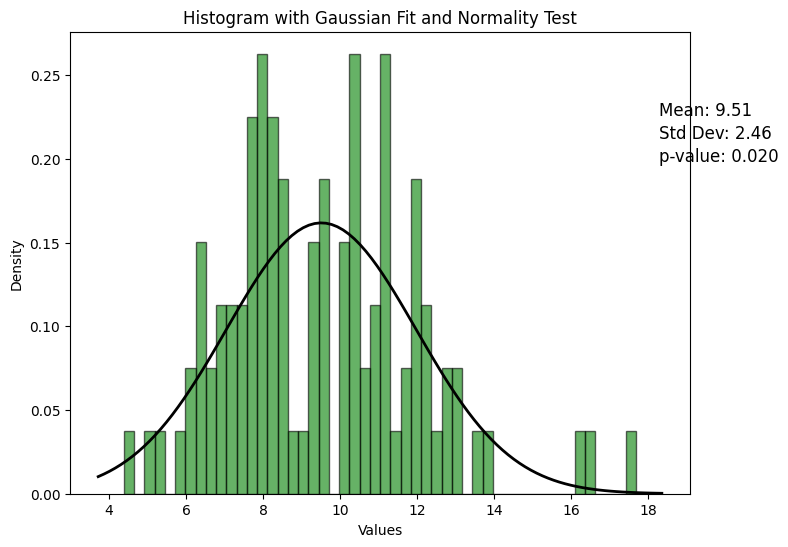

Reject the null hypothesis (data does not follow a Gaussian distribution).


In [59]:
# calculate mean and standard deviation
mu, std = norm.fit(df['A'])

# perform the Shapiro-Wilk test for normality
stat, p_value = shapiro(df['A'])

# preate a histogram
plt.figure(figsize=(8, 6))
count, bins, ignored = plt.hist(df['A'], bins=50, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the Gaussian fit
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add text for mean, std, and p-value
plt.text(0.95, 0.85, f'Mean: {mu:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.95, 0.80, f'Std Dev: {std:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.95, 0.75, f'p-value: {p_value:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram with Gaussian Fit and Normality Test')

# Show the plot
plt.show()


# hypothesis test result
alpha = 0.05  # significance level
if p_value > alpha:
    print("Fail to reject the null hypothesis (data follows a Gaussian distribution).")
else:
    print("Reject the null hypothesis (data does not follow a Gaussian distribution).")